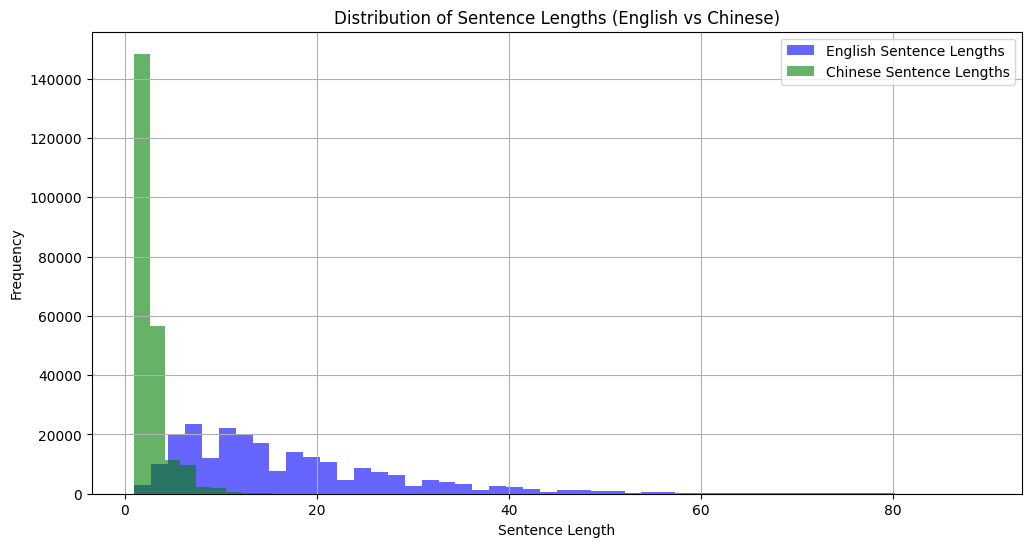


Sample Translation Pairs:
EN: Thank you so much, Chris. And it's truly a great honor to have the opportunity to come to this stage twice; I'm extremely grateful.
ZH: 非常谢谢，克里斯。的确非常荣幸 能有第二次站在这个台上的机会，我真是非常感激。
--------------------------------------------------
EN: I have been blown away by this conference, and I want to thank all of you for the many nice comments about what I had to say the other night.
ZH: 这个会议真是让我感到惊叹不已，我还要谢谢你们留下的 关于我上次演讲的精彩评论
--------------------------------------------------
EN: And I say that sincerely, partly because  I need that.  Put yourselves in my position.
ZH: 我是非常真诚的，部分原因是因为----我的确非常需要！ 你设身处地为我想想！
--------------------------------------------------
EN: I flew on Air Force Two for eight years.
ZH: 我坐了8年的空军二号。
--------------------------------------------------
EN: Now I have to take off my shoes or boots to get on an airplane!
ZH: 不过现在上飞机前我则要脱掉我的鞋子
--------------------------------------------------


In [24]:
import matplotlib.pyplot as plt
from datasets import load_dataset

# 載入 IWSLT 2017 English-to-Chinese 資料集
dataset = load_dataset('iwslt2017', 'iwslt2017-en-zh', split='train', trust_remote_code=True)

# 定義幫助函數來計算句子長度
def sentence_length_stats(dataset):
    source_lengths = [len(item['translation']['en'].split()) for item in dataset]
    target_lengths = [len(item['translation']['zh'].split()) for item in dataset]
    return source_lengths, target_lengths

# 計算英文與中文句子長度
source_lengths, target_lengths = sentence_length_stats(dataset)

# 可視化中英文句子長度分佈
plt.figure(figsize=(12, 6))

# 英文句子長度分佈
plt.hist(source_lengths, bins=50, alpha=0.6, label='English Sentence Lengths', color='blue')
# 中文句子長度分佈
plt.hist(target_lengths, bins=50, alpha=0.6, label='Chinese Sentence Lengths', color='green')

plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths (English vs Chinese)')
plt.legend()
plt.grid()
plt.show()

# 顯示部分翻譯對
print("\nSample Translation Pairs:")
for i in range(5):
    print(f"EN: {dataset[i]['translation']['en']}")
    print(f"ZH: {dataset[i]['translation']['zh']}")
    print("-" * 50)


Generating Word Cloud for Most Common Tokens...


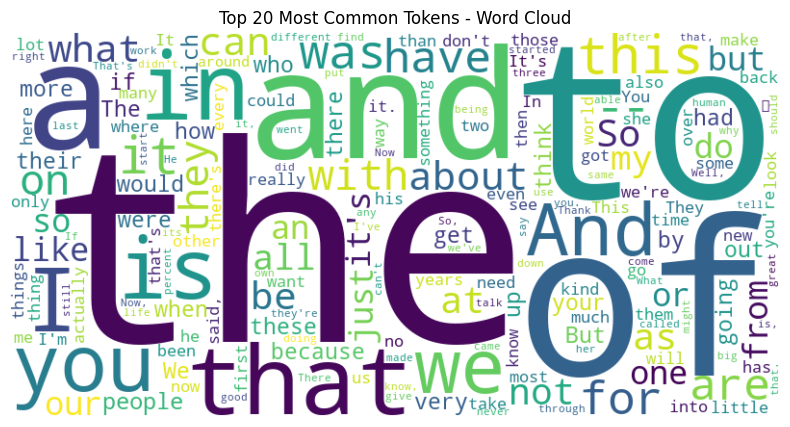

Performing Part-of-Speech Tagging Analysis...


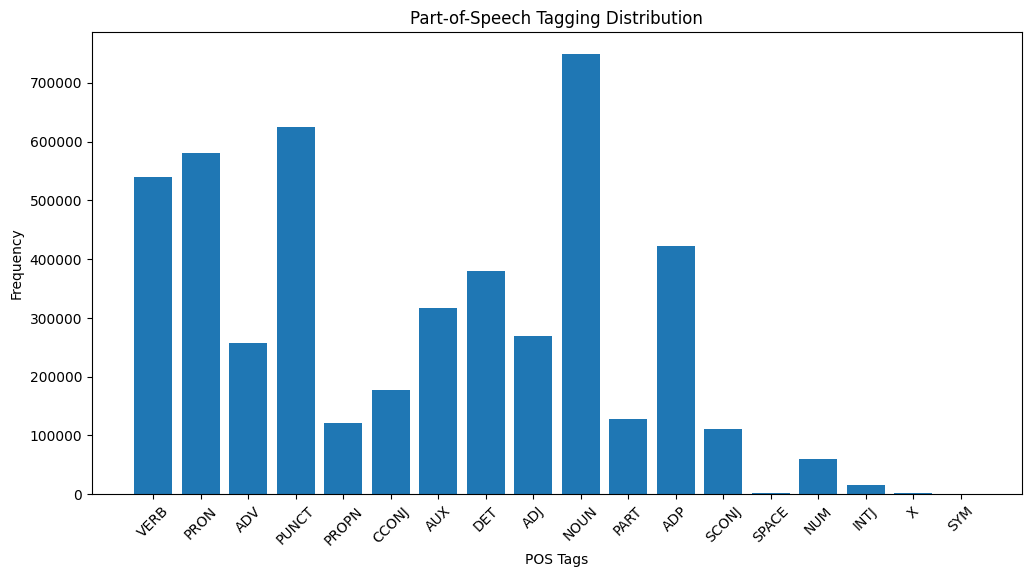

Analyzing Sentence Translation Coverage Types...


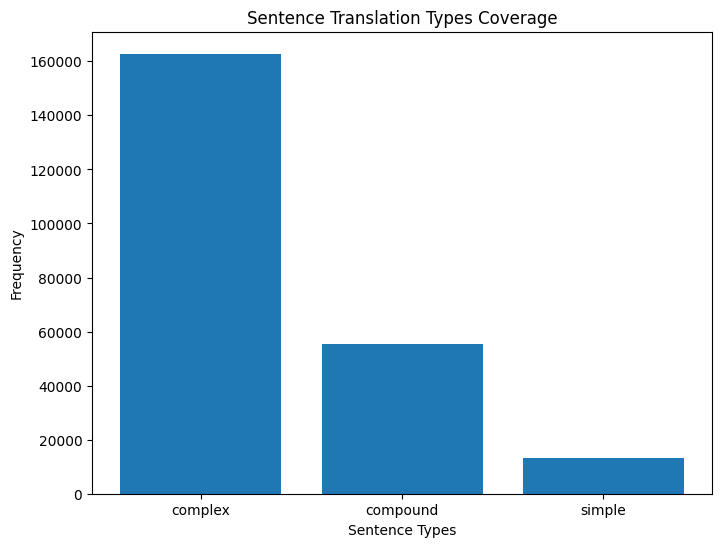

Analyzing Low-Frequency Tokens...
Number of low-frequency tokens: 67888


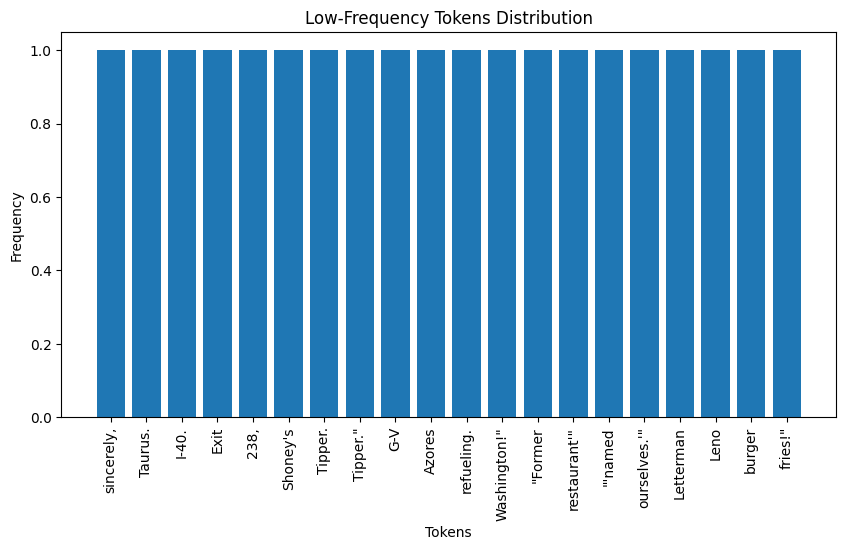

Checking for Duplicate Sentences...
Number of duplicate sentences: 738
Sample duplicate sentences:
Thank you. - 966 occurrences
Thanks so much. - 4 occurrences
Thank you very much. - 360 occurrences
Here's another example. - 3 occurrences
It's not sustainable. - 2 occurrences
Analysis complete!


In [26]:
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter, defaultdict
from datasets import load_dataset

# 載入 SpaCy 模型
nlp = spacy.load("en_core_web_sm")

# 載入 IWSLT 2017 英中翻譯資料集
dataset = load_dataset('iwslt2017', 'iwslt2017-en-zh', split='train', trust_remote_code=True)

# ----------------------
# Top 20 Most Common Tokens (Word Cloud)
# ----------------------
print("Generating Word Cloud for Most Common Tokens...")
all_text = " ".join([example["translation"]["en"] for example in dataset])
token_counts = Counter(all_text.split())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(token_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 20 Most Common Tokens - Word Cloud")
plt.show()

# ----------------------
# 詞性分佈分析 (Part-of-Speech Tagging)
# ----------------------
print("Performing Part-of-Speech Tagging Analysis...")
pos_counts = Counter()
for example in dataset:
    doc = nlp(example["translation"]["en"])
    pos_counts.update([token.pos_ for token in doc])

plt.figure(figsize=(12, 6))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("Part-of-Speech Tagging Distribution")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# # ----------------------
# # 詞對齊分析 (需要外部工具)
# # ----------------------
# # 準備 fast_align 或 GIZA++ 的輸入格式
# print("Preparing input for word alignment analysis...")
# with open("alignment_input.txt", "w", encoding="utf-8") as f:
#     for example in dataset:
#         en = example["translation"]["en"]
#         zh = example["translation"]["zh"]
#         f.write(f"{en} ||| {zh}\n")

# print("Input for word alignment saved to 'alignment_input.txt'.")

# ----------------------
# 句子翻譯對覆蓋類型
# ----------------------
print("Analyzing Sentence Translation Coverage Types...")
categories = defaultdict(int)

for example in dataset:
    text = example["translation"]["en"]
    if len(text.split()) < 5:
        categories["simple"] += 1
    elif len(text.split()) < 10:
        categories["compound"] += 1
    else:
        categories["complex"] += 1

plt.figure(figsize=(8, 6))
plt.bar(categories.keys(), categories.values())
plt.title("Sentence Translation Types Coverage")
plt.xlabel("Sentence Types")
plt.ylabel("Frequency")
plt.show()

# ----------------------
# 低頻詞分析 (Low-Frequency Tokens)
# ----------------------
print("Analyzing Low-Frequency Tokens...")
low_freq_tokens = {token: count for token, count in token_counts.items() if count == 1}
print(f"Number of low-frequency tokens: {len(low_freq_tokens)}")

# 繪製部分低頻詞的分佈條形圖
plt.figure(figsize=(10, 5))
plt.bar(list(low_freq_tokens.keys())[:20], list(low_freq_tokens.values())[:20])
plt.title("Low-Frequency Tokens Distribution")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

# ----------------------
# 重複句子統計
# ----------------------
print("Checking for Duplicate Sentences...")
all_sentences = [example["translation"]["en"] for example in dataset]
sentence_counts = Counter(all_sentences)
duplicate_sentences = {sent: count for sent, count in sentence_counts.items() if count > 1}

print(f"Number of duplicate sentences: {len(duplicate_sentences)}")
print("Sample duplicate sentences:")
for sent, count in list(duplicate_sentences.items())[:5]:
    print(f"{sent} - {count} occurrences")

print("Analysis complete!")
